**September 12, 2019**  
**ATMOS 5020: Environmental Programming**  
**Brian Blaylock and John Horel** 

> # Today's Objective
> Aaron Meyer will teach us how to import and work with datasets using the Pandas module.
>
> Remember: Assignment #2 is due on Friday.

The content of these notes is for your reference.

# I/O Supplemental Material (Chapter 6)
I/O stands for data input and output. As an environmental scientist, it is imperative that you learn how to load datasets into Python so you can work with the data. 

## 🗃 Download repository from GitHub
We have used GitHub as a repository of these class notes. Let's download then entire repository to your computer.

In the terminal, `cd Desktop`, and then type the following:

    git clone https://github.com/johnhorel/ATMOS_5020_2019.git

This may take some time, but it will download all the class material into a new directory called `ATMOS_5020_2019` on your Desktop.

When you want to update the content with updates from GitHub, `cd ATMOS_5020_2019` and type:

    git pull

## 🌧 Precipitation file
Earlier, we worked with the `utah_precip_oct.csv` file. This file is contained in the `ATMOS_5020_2019/data/` directory. 

Open the `utah_precip_oct.csv` file in Jupyter Lab and look at the data.


### Open precipitation file with Python (most basic method)
The most basic way to read a file in Python is with the built-in `open()` function. When you open a file, you need to specify the mode:

|mode|description|
|--|--|
|`'r'`| file is open to read only
|`'w'`| file is open to write only
|`'w+'` or `'r+'`| output will overwrite the existing content in the file
|`'a'`| output will be appended to the end of an existing file
|`'b'`| indicates the file content is binary

In [2]:
# Open the file with read mode
f = open('./data/utah_precip_oct.csv', 'r')

# Save the contents of the lines to a variable
lines = f.readlines()

# Always remember to close the file
f.close()

In [2]:
# display the first 20 lines (don't want to show too much in this window)
lines[:20]

['STATION__OBSERVATIONS__total_precip_value_1 (mm),STATION__ELEVATION (ft),STATION__STID,STATION__NAME,STATION__LATITUDE,STATION__LONGITUDE,STATION__OBSERVATIONS__count_1\n',
 '37.59,4806,WBB,U of U William Browning Building,40.76623,-111.84755,12681\n',
 '43.94,4600,HOL,North Holladay,40.6756,-111.8259,846\n',
 '51.05,6855,SNC,PARK CITY MUN G.C.,40.66,-111.5149,846\n',
 '112.27,7402,SNI,SNOWBASIN - MID  BOWL,41.1995,-111.859,842\n',
 '103.38,6316,SBE,SNOWBASIN - BASE,41.2151,-111.8582,841\n',
 '27.69,5741,ZNP,ZION NATIONAL PARK,37.2339,-112.8741,845\n',
 '16,5500,CRN,CAPITOL REEF NP,38.2898,-111.2619,845\n',
 '9.65,4242,GNI,Gunnison Island,41.33216,-112.85432,2135\n',
 '5.59,4242,LMS,Locomotive Springs,41.701,-112.86181,2536\n',
 '19.81,5039,LMR,Lakeside Mountain,41.06084,-112.89173,2536\n',
 '43.43,8015,TPC,Timpanogos Rim,40.43524,-111.70741,846\n',
 '30.99,4226,KSLC,"Salt Lake City, Salt Lake City International Airport",40.77069,-111.96503,2468\n',
 '13.72,4596,KU42,"Salt Lake City,

This is difficult to work with, becuase each line is a string. There are many methods to convert this data. Here is one way:

In [3]:
# Use a list comprehension to grab the rain amounts from each line.
## For each line in the file (skipping the first) 
## split the line by the ',' character and get the first item.
## Then convert the value to a float

rain_mm = [float(i.split(',')[0]) for i in lines[1:]]

In [4]:
# Again, only display the first 20 items.
rain_mm[:20]

[37.59,
 43.94,
 51.05,
 112.27,
 103.38,
 27.69,
 16.0,
 9.65,
 5.59,
 19.81,
 43.43,
 30.99,
 13.72,
 31.75,
 40.13,
 42.93,
 30.48,
 52.83,
 22.35,
 35.05]

In [5]:
# Sort the array and show the top five
rain_mm.sort(reverse=True)
rain_mm[:5]

[190.5, 166.88, 149.86, 147.32, 139.7]

### Open precipitation file with Numpy `np.genfromtxt()`
Numpy has some ability to open the file. Note, that since we use the ',' character as a delimeter and there are commas included in some of the station names

    30.99,4226,KSLC,"Salt Lake City, Salt Lake City International Airport",40.77069,-111.96503,2468\n'

We want to avoid those, so lets only import the column with the precipitation amount and the station ID.

In [6]:
import numpy as np

In [7]:
precip_data = np.genfromtxt('./data/utah_precip_oct.csv', skip_header=1, delimiter=',', usecols=[0], dtype=None, encoding='UTF-8')

In [8]:
# Again, only display the first 20 items
print(precip_data[:20])

[ 37.59  43.94  51.05 112.27 103.38  27.69  16.     9.65   5.59  19.81
  43.43  30.99  13.72  31.75  40.13  42.93  30.48  52.83  22.35  35.05]


In [9]:
# Sort and display last 5 greatest numbers
np.sort(precip_data)[-5:]

array([139.7 , 147.32, 149.86, 166.88, 190.5 ])

In [10]:
# Sort, reverse the array, and get first 5 numbers
np.sort(precip_data)[::-1][:5]

array([190.5 , 166.88, 149.86, 147.32, 139.7 ])

In [11]:
# Make a histogram of precipitation amounts with 50 bins
import matplotlib.pyplot as plt

plt.hist(precip_data, bins=50)
plt.ylabel("Number of Stations")
plt.xlabel("Precipitation Amount (mm)")
plt.title('Precipitation Observations in October 2018', fontsize=15)
plt.xlim([0,200]);

# FYI: a semicolon on the last line will suppress any output matplotlib prints to the screen

## 🎈 Weather Balloon: Download text from a URL

We can access tons of information directly from the web and load that data into Python.

Obviously, there are many different ways to access that data. Some methods are more than others appropriate depending on the situation and data type. Some methods are easy and some are hard. There are shortcuts, which may or may not work depending on the data you work with.

<img src="./images/sounding.gif" width=400>

One resource to get weather data is a Wyoming web site that provides observations made from rawinsondes of the vertical distribution of wind, tempeature, and moisure with height at hundreds of locations across the world. This data is otherwise known as a **sounding**.

Take a look at http://weather.uwyo.edu/upperair/sounding.html and click on SLC.

You will see an HTML file with data for different weather variables at different levels:

http://weather.uwyo.edu/cgi-bin/sounding?region=naconf&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=09&FROM=1112&TO=1112&STNM=72572



In [12]:
# Define a string that points to the web content URL. 
# There are ways to concatenate variables to generate a string, but let's not bother with that today.
URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=naconf&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=09&FROM=1112&TO=1112&STNM=72572"

We will use the `requests` module to retrieve the text from that website.

In [13]:
import requests
data = requests.get(URL).text

In [14]:
data

'<HTML>\n<TITLE>University of Wyoming - Radiosonde Data</TITLE>\n<LINK REL="StyleSheet" HREF="/resources/select.css" TYPE="text/css">\n<BODY BGCOLOR="white">\n<H2>72572 SLC Salt Lake City Observations at 12Z 11 Sep 2019</H2>\n<PRE>\n-----------------------------------------------------------------------------\n   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV\n    hPa     m      C      C      %    g/kg    deg   knot     K      K      K \n-----------------------------------------------------------------------------\n 1000.0     81                                                               \n  925.0    761                                                               \n  870.0   1289   13.6   12.8     95  10.79    275      4  298.4  330.0  300.3\n  863.0   1357   11.8    9.2     84   8.53    272      7  297.2  322.3  298.7\n  857.0   1415   11.2    8.8     85   8.36    269     10  297.2  321.8  298.7\n  850.0   1483   11.0    7.9     81   7.92    265     13

Each line is separated by the new line character `\n`. Let's split the lines based on that character

In [15]:
data = data.split('\n')

In [16]:
data

['<HTML>',
 '<TITLE>University of Wyoming - Radiosonde Data</TITLE>',
 '<LINK REL="StyleSheet" HREF="/resources/select.css" TYPE="text/css">',
 '<BODY BGCOLOR="white">',
 '<H2>72572 SLC Salt Lake City Observations at 12Z 11 Sep 2019</H2>',
 '<PRE>',
 '-----------------------------------------------------------------------------',
 '   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV',
 '    hPa     m      C      C      %    g/kg    deg   knot     K      K      K ',
 '-----------------------------------------------------------------------------',
 ' 1000.0     81                                                               ',
 '  925.0    761                                                               ',
 '  870.0   1289   13.6   12.8     95  10.79    275      4  298.4  330.0  300.3',
 '  863.0   1357   11.8    9.2     84   8.53    272      7  297.2  322.3  298.7',
 '  857.0   1415   11.2    8.8     85   8.36    269     10  297.2  321.8  298.7',
 '  850.0   

The data we want is in the middle rows. Let's just get that data

In [17]:
data_rows = data[12:-62]

In [18]:
data_rows

['  870.0   1289   13.6   12.8     95  10.79    275      4  298.4  330.0  300.3',
 '  863.0   1357   11.8    9.2     84   8.53    272      7  297.2  322.3  298.7',
 '  857.0   1415   11.2    8.8     85   8.36    269     10  297.2  321.8  298.7',
 '  850.0   1483   11.0    7.9     81   7.92    265     13  297.7  321.1  299.1',
 '  837.0   1612   10.0    7.4     84   7.77    219     10  297.9  320.9  299.3',
 '  828.0   1702   10.6    5.6     71   6.93    186      7  299.5  320.2  300.7',
 '  815.5   1829   10.4    4.7     68   6.62    140      4  300.6  320.6  301.8',
 '  811.0   1875   10.4    4.4     66   6.51    136      4  301.0  320.7  302.2',
 '  786.0   2134    8.3    3.8     73   6.44    110      5  301.5  321.0  302.7',
 '  761.0   2401    6.2    3.2     81   6.37    136      6  302.0  321.3  303.2',
 '  757.6   2438    6.1    2.7     79   6.16    140      6  302.3  321.0  303.4',
 '  744.0   2586    5.6    0.6     70   5.40    140      7  303.3  319.9  304.3',
 '  729.9   2743

In [19]:
# Convert the data to a float, line by line
data_converted = np.array([np.fromstring(i, sep=' ') for i in data_rows])

In [20]:
# Display the first five rows
data_converted[:5]

array([[ 870.  , 1289.  ,   13.6 ,   12.8 ,   95.  ,   10.79,  275.  ,
           4.  ,  298.4 ,  330.  ,  300.3 ],
       [ 863.  , 1357.  ,   11.8 ,    9.2 ,   84.  ,    8.53,  272.  ,
           7.  ,  297.2 ,  322.3 ,  298.7 ],
       [ 857.  , 1415.  ,   11.2 ,    8.8 ,   85.  ,    8.36,  269.  ,
          10.  ,  297.2 ,  321.8 ,  298.7 ],
       [ 850.  , 1483.  ,   11.  ,    7.9 ,   81.  ,    7.92,  265.  ,
          13.  ,  297.7 ,  321.1 ,  299.1 ],
       [ 837.  , 1612.  ,   10.  ,    7.4 ,   84.  ,    7.77,  219.  ,
          10.  ,  297.9 ,  320.9 ,  299.3 ]])

In [21]:
# Store the data from each colulmn in a new variable
pressure = data_converted[:,0] # hPa
height = data_converted[:,1]   # m
temp = data_converted[:,2]     # C
dewpoint = data_converted[:,3] # C
rh = data_converted[:,4]       # %
wind_dir = data_converted[:,6]  # degrees
wind_spd = data_converted[:,7]  # knots

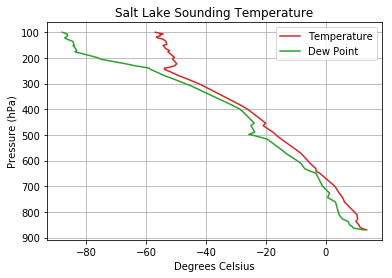

In [22]:
plt.plot(temp, pressure, color='tab:red', label='Temperature')
plt.plot(dewpoint, pressure, color='tab:green', label='Dew Point')

plt.xlabel('Degrees Celsius')
plt.ylabel('Pressure (hPa)')
plt.title('Salt Lake Sounding Temperature')
plt.grid()
plt.legend()

# Invert y axis because pressure decreases with height
plt.gca().invert_yaxis()

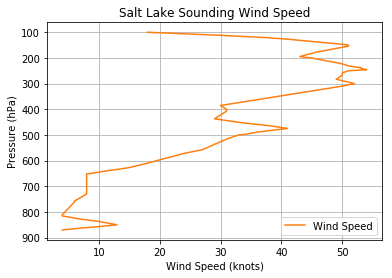

In [23]:
plt.plot(wind_spd, pressure, color='tab:orange', label='Wind Speed')

plt.xlabel('Wind Speed (knots)')
plt.ylabel('Pressure (hPa)')
plt.title('Salt Lake Sounding Wind Speed')
plt.grid()
plt.legend()

# Invert y axis because pressure decreases with height
plt.gca().invert_yaxis()

## ☁ Synoptic API: Download JSON formatted Data
For those interested in accessing MesoWest data, you can access it easily through the API which returns data in JSON format. https://synopticlabs.org/api/

Signup and get your own API key and token: https://synopticlabs.org/api/signup/

Read the docs to learn about the different types of requests you can make.

In [24]:
URL = 'https://api.synopticlabs.org/v2/stations/timeseries?&token=demotoken&start=201909110000&end=201909111200&stid=wbb,mtmet&vars=air_temp'
import requests
data = requests.get(URL).json()

In [25]:
# explore the JSON file by looking at the keys() and items in the lists
print(data.keys())

dict_keys(['UNITS', 'QC_SUMMARY', 'STATION', 'SUMMARY'])


In [26]:
len(data['STATION'])

2

In [27]:
data['STATION'][0].keys()

dict_keys(['STATUS', 'MNET_ID', 'PERIOD_OF_RECORD', 'ELEVATION', 'NAME', 'STID', 'SENSOR_VARIABLES', 'ELEV_DEM', 'LONGITUDE', 'STATE', 'OBSERVATIONS', 'RESTRICTED', 'QC_FLAGGED', 'LATITUDE', 'TIMEZONE', 'ID'])

In [28]:
data['STATION'][0]['OBSERVATIONS'].keys()

dict_keys(['date_time', 'air_temp_set_1'])

In [29]:
stn_0_id = data['STATION'][0]['STID']
stn_0_temps = data['STATION'][0]['OBSERVATIONS']['air_temp_set_1']

stn_1_id = data['STATION'][1]['STID']
stn_1_temps = data['STATION'][1]['OBSERVATIONS']['air_temp_set_1']

In [30]:
# look at the date string format
data['STATION'][0]['OBSERVATIONS']['date_time'][0]

'2019-09-11T00:00:00Z'

In [31]:
# Convert the date strings to python datetime objects
from datetime import datetime

stn_0_DATES = [datetime.strptime(i, '%Y-%m-%dT%H:%M:%SZ') for i in data['STATION'][0]['OBSERVATIONS']['date_time']]

stn_1_DATES = [datetime.strptime(i, '%Y-%m-%dT%H:%M:%SZ') for i in data['STATION'][1]['OBSERVATIONS']['date_time']]

In [32]:
# Now what does the dates look like? (display first five)
stn_0_DATES[0:5]

[datetime.datetime(2019, 9, 11, 0, 0),
 datetime.datetime(2019, 9, 11, 0, 1),
 datetime.datetime(2019, 9, 11, 0, 2),
 datetime.datetime(2019, 9, 11, 0, 3),
 datetime.datetime(2019, 9, 11, 0, 4)]

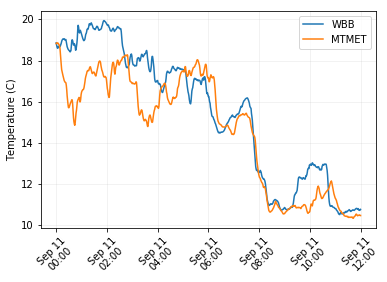

In [33]:
# Now make a plot
plt.plot(stn_0_DATES, stn_0_temps, label=stn_0_id)
plt.plot(stn_0_DATES, stn_1_temps, label=stn_1_id)
plt.legend()

plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)

# Convert xtick datetime display format
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b %d\n%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.grid(alpha=.2)

## 🌐 Download a file from the web
The methods above were to request text-based data from the web. This section demonstrates how to download a file from the web.

In [34]:
import urllib.request
URL = 'http://meso1.chpc.utah.edu/station_cameras/wbbs_cam/wbbs_cam_current.jpg'
response = urllib.request.urlretrieve(URL, './images/Camera_Image.jpg')

The above cell will download the image and save it to a new file in the images directory.

![](./images/Camera_Image.jpg)

# ✨ Other file types

You will likely encounter many other file types throughout your careers. 

- NetCDF and HDF5 files (Chapter 13, but use `xarray` to open these)
    - Satellite data and gridded weather data is in this format
- GRIB2 files 
    - operational weather model data is typically in this format
- Shape files
    - GIS folks will be familiar with this type of data
- Other text and csv-formated data